### Test cam_speaker_rec  
R.Sprik 6/6/2024

Test simultaneous speaker sound, recording and taking a still image 

In [1]:
import sounddevice as sd
import matplotlib.pyplot as plt 
%matplotlib widget
import scipy.io.wavfile as wv

# get available devices
# print (sd.query_devices())
dev_in = sd.query_devices("UMA16v2")
dev_out = sd.query_devices("USB Audio Device") # for red boxes plugged into KIWI audio adapter

input_device_id = dev_in['index']
output_device_id = dev_out['index']
print(f"Found devices: in:{input_device_id} out:{output_device_id}")

# default settings
Fs           = 48000
nchan_in     = 16
nchan_out    = 2
sd.default.samplerate = Fs
sd.default.channels   = [nchan_in, nchan_out]
sd.default.device     = [input_device_id, output_device_id]

npt = 128*1024 # per channel
dur = npt/Fs
print(f"npt = {npt}")
print(f"Fs  = {Fs} S/s")
print(f"dur = {dur} s")

# print(">>> Start recording for %5.2fs (%d samples per ch)" % (dur, npt))
# rec = sd.rec(npt, device = indev)
# sd.wait()
print(sd.query_devices())
print("Done.")


Found devices: in:1 out:0
npt = 131072
Fs  = 48000 S/s
dur = 2.7306666666666666 s
< 0 USB Audio Device: - (hw:2,0), ALSA (1 in, 2 out)
> 1 UMA16v2: USB Audio (hw:3,0), ALSA (16 in, 2 out)
  2 pulse, ALSA (32 in, 32 out)
  3 default, ALSA (32 in, 32 out)
Done.


### Generate stereo sound on boxes

(131072, 2)


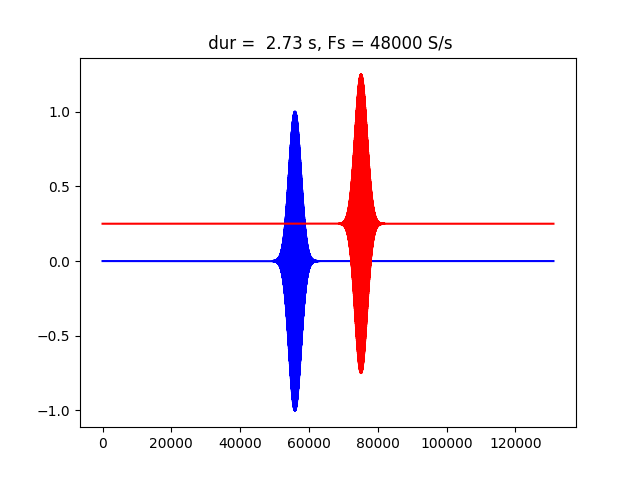

In [2]:
import numpy as np
from signals import SineWave, PulseWave

# outsmp = SineWave(npt, Fs, 1600, amp=0.2)

aamp = 1.0
s1 = PulseWave(npt, Fs, 2000, amp=aamp, width = 0.05, tshift = -0.2)
s2 = PulseWave(npt, Fs, 1000, amp=aamp, width = 0.05, tshift =  0.2)
outsmp = np.zeros((npt,2))
outsmp[:,0] = s1
outsmp[:,1] = s2

print(np.shape(outsmp))

# Plot output wave
plt.close("all")
plt.figure(10)
plt.plot(outsmp[:,0], 'b-')
pltoff = 0.25
plt.plot(outsmp[:,1]+pltoff, 'r-')
plt.title(" dur = %5.2f s, Fs = %5.0f S/s" % (dur, Fs))
plt.show()

### Play sound

In [3]:
sd.play(outsmp)

### Camera

In [14]:
from picamera2 import Picamera2
import time
import os
#os.environ['LIBCAMERA_LOG_LEVELS'] = '4'
#Picamera2.set_logging(Picamera2.ERROR)

camera = None

def initialize_camera():
    global camera
    camera = Picamera2()
    config = camera.create_still_configuration()
    # config["main"]["size"] = (4608, 2592)
    config["main"]["size"] = (1920, 1440)
    camera.configure(config)

def capture_image(filename: str):
    filepath = os.path.expanduser(filename)
    print("capturing image", filepath)
    camera.start()
    time.sleep(0.5)
    camera.capture_file(filepath)
    camera.stop()
    camera.close()

#### Test image

In [15]:
initialize_camera()
capture_image("test.jpg")
print("done.")

[2:45:18.596323086] [6940]  INFO Camera camera_manager.cpp:284 libcamera v0.2.0+120-eb00c13d
[2:45:18.605895826] [6948]  INFO RPI pisp.cpp:695 libpisp version v1.0.5 999da5acb4f4 17-04-2024 (14:29:29)
[2:45:18.617695271] [6948]  INFO RPI pisp.cpp:1154 Registered camera /base/axi/pcie@120000/rp1/i2c@80000/imx708@1a to CFE device /dev/media2 and ISP device /dev/media0 using PiSP variant BCM2712_C0
[2:45:18.619707252] [6940]  INFO Camera camera_manager.cpp:284 libcamera v0.2.0+120-eb00c13d
[2:45:18.628641678] [6951]  INFO RPI pisp.cpp:695 libpisp version v1.0.5 999da5acb4f4 17-04-2024 (14:29:29)
[2:45:18.640037289] [6951]  INFO RPI pisp.cpp:1154 Registered camera /base/axi/pcie@120000/rp1/i2c@80000/imx708@1a to CFE device /dev/media2 and ISP device /dev/media0 using PiSP variant BCM2712_C0
[2:45:18.643130586] [6940]  WARN V4L2 v4l2_pixelformat.cpp:344 Unsupported V4L2 pixel format RPBP
[2:45:18.643854178] [6940]  INFO Camera camera.cpp:1183 configuring streams: (0) 1920x1440-BGR888 (1) 46

capturing image test.jpg
done.


### recording with sound source and still image

[2:26:07.674746698] [6595]  INFO Camera camera_manager.cpp:284 libcamera v0.2.0+120-eb00c13d
[2:26:07.686696920] [6605]  INFO RPI pisp.cpp:695 libpisp version v1.0.5 999da5acb4f4 17-04-2024 (14:29:29)
[2:26:07.699289827] [6605]  INFO RPI pisp.cpp:1154 Registered camera /base/axi/pcie@120000/rp1/i2c@80000/imx708@1a to CFE device /dev/media2 and ISP device /dev/media0 using PiSP variant BCM2712_C0
[2:26:07.702256161] [6595]  INFO Camera camera_manager.cpp:284 libcamera v0.2.0+120-eb00c13d
[2:26:07.711249994] [6608]  INFO RPI pisp.cpp:695 libpisp version v1.0.5 999da5acb4f4 17-04-2024 (14:29:29)
[2:26:07.722917401] [6608]  INFO RPI pisp.cpp:1154 Registered camera /base/axi/pcie@120000/rp1/i2c@80000/imx708@1a to CFE device /dev/media2 and ISP device /dev/media0 using PiSP variant BCM2712_C0
picamera2.picamera2 INFO: Initialization successful.
picamera2.picamera2 INFO: Camera now open.
picamera2.picamera2 INFO: Camera configuration has been adjusted!
[2:26:07.727233161] [6595]  WARN V4L2 v4

snapshot:
capturing image mytest.jpg


picamera2.request INFO: Saved <picamera2.request.Helpers object at 0x7fff655720d0> to file mytest.jpg.
picamera2.request INFO: Time taken for encode: 18.38907400087919 ms.
picamera2.picamera2 INFO: Camera stopped
picamera2.picamera2 INFO: Camera closed successfully.


playrec:


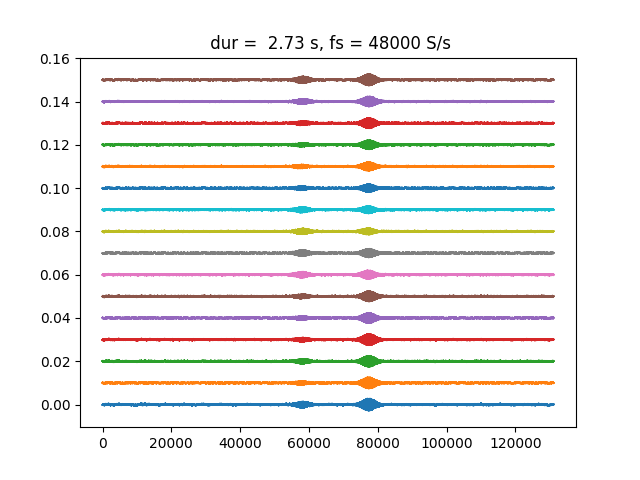


>>> Saving to file: mytest.wav


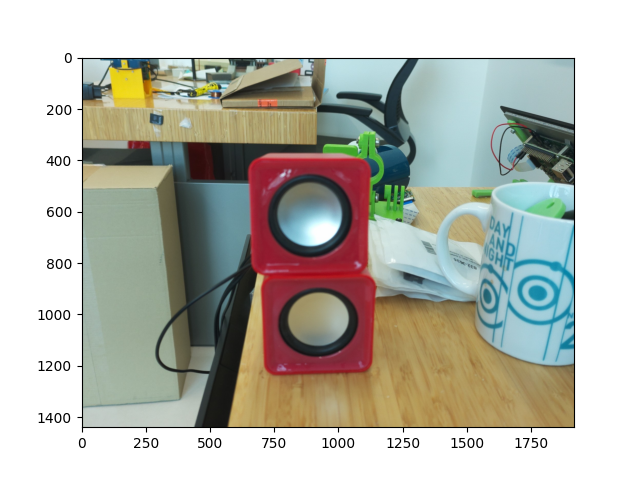

done.


In [23]:
import scipy.io.wavfile as wv

# take still image and save
filnm = "mytest" #file name base used for image and sound saving
print("snapshot:")
initialize_camera()
capture_image(filnm+".jpg")

print("playrec:")
insmp = sd.playrec(outsmp, samplerate=Fs)
sd.wait() # wait until finished recording

# plot of traces
off = 0.01
plt.close(20)
plt.figure(20)
for chn in range(nchan_in):
    plt.plot(insmp[:,chn]+chn*off, '-')
plt.title(" dur = %5.2f s, fs = %5.0f S/s" % (dur, Fs))
plt.show()

filename = filnm+".wav"
print("\n>>> Saving to file: %s" % (filename))
wv.write(filename, Fs, insmp)

#plot of image
img = plt.imread(filnm+".jpg")
plt.figure(30)
plt.imshow(img)
plt.show()

print("done.")